In [16]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

In [17]:
#load the song from file location
x, sr = librosa.load('conga_sample/conga1.wav')

In [18]:
#display the original audio
#ipd.Audio(x, rate=sr)

In [19]:
#compute short time fourier transform
S = librosa.stft(x)

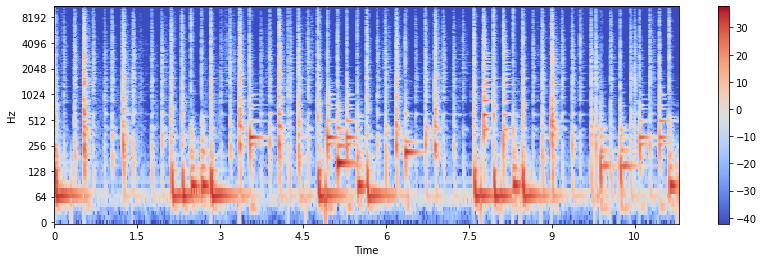

In [20]:
#plot spectrogram of the sound
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [21]:
#Separate a complex-valued spectrogram S into its magnitude (X) and phase (X_phase), S=X*X_phase
X, X_phase = librosa.magphase(S)
n_components = 6
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)

In [22]:
print(W.shape)
print(H.shape)

(1025, 6)
(6, 487)


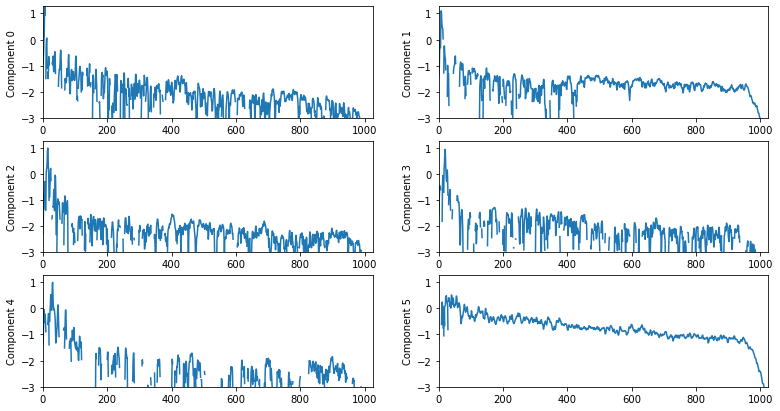

In [23]:
#Display the spectral profiles, {w_1, ..., w_R}
plt.figure(figsize=(13, 7))
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

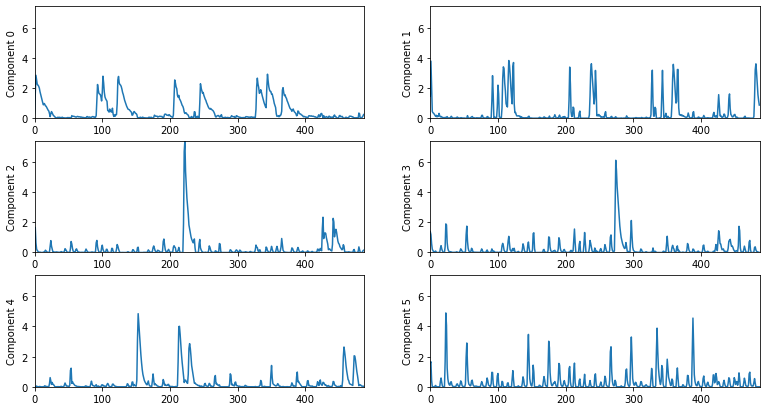

In [24]:
#Display the temporal activations, {h_1, ..., h_R}
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

Finally, re-create the individual components, and listen to them. To do this, we will reconstruct the magnitude spectrogram from the NMF outputs and use the phase spectrogram from the original signal.

In [25]:
#re-create the individual components by reconstructing the magnitude spectrogram from the NMF outputs and 
#use the phase spectrogram from the original signal.
for n in range(n_components):
    
    # Re-create the STFT of a single NMF component.
    Y = scipy.outer(W[:,n], H[n])*X_phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)
    
    print('Component {}:'.format(n))
    ipd.display( ipd.Audio(y, rate=sr) )

Component 0:


Component 1:


Component 2:


Component 3:


Component 4:


Component 5:


In [26]:
# Re-create the STFT from all NMF components.
Y1 = numpy.dot(W,H)*X_phase

# Transform the STFT into the time domain.
reconstructed_signal = librosa.istft(Y1, length=len(x))
ipd.Audio(reconstructed_signal, rate=sr)

Listen to the residual:

In [27]:
residual = x - reconstructed_signal
#prevent automatic gain scaling
residual[0] = 1 
ipd.Audio(residual, rate=sr)